# Lab1 (Student version)

We can use the following libraries.

In [1]:
import matplotlib.pyplot as plt
import math
import sys
print(sys.version)

3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]


## Exercise 1: getting things started with undirected graphs

### Question 1

Create manually an undirected graph (with approximately a dozen nodes) _test_graph.txt_ and store it in a text file in the format (for each line):

x    y 

Where x and y are separated with a tabulation. You will use them to test your codes.

### Question 2

Download the following graphs (be careful these datasets are quite heavy):

http://snap.stanford.edu/data/com-Amazon.html

http://snap.stanford.edu/data/com-LiveJournal.html

Also, download _graph.txt_ and _bugged_graph.txt_ from https://moodle-sciences-23.sorbonne-universite.fr

These datasets allow you to check the results of your programs.


### Question 3

Make a program which reads a graph from a text file and counts the number of nodes and edges in a graph (without storing the graph in memory). 

In [2]:
def count_node_link(filename):
    nodes=set()
    count_nodes=0
    count_edges=0

    with open(filename,"r") as graph_file:
        for line in graph_file:
            node1, node2 = [int(node) for node in line.split()] #split the line and convert to int

            if node1 not in nodes:
                count_nodes+=1
                nodes.add(node1)
            if node2 not in nodes:
                count_nodes+=1
                nodes.add(node2)
            
            count_edges+=1
    
    return count_nodes,count_edges

### Question 3bis

Apply the previous code to _bugged_graph.txt_ and then look at the content of the file. Does it correspond to the expected result? Explain in one sentence what the problem is.

In [3]:
print(count_node_link("bugged_graph.txt"))

(10, 18)


### Question 4

Make a program which counts the degree (i.e. the number of edges) of a node of a graph (without storing it in memory).

In [4]:
def compute_degree(filename,node):
    degree=0
    with open(filename,"r") as graph_file:
        for line in graph_file:
            node1, node2 = [int(node) for node in line.split()]

            if node1 == node:
                degree+=1
            if node2 == node and node2 != node1:
                degree+=1
    return degree

## Exercise 2: loading a graph in memory

### Question 5

Make a program which reads a graph from a text file and load it as a python **dictionary of lists**. 
This implementation of the adjacency list format will be the standard format that we will use to store a graph in this course.

In [5]:
def graph_from_file(file_name): #noeud1: [voisin1, voisin2, ...]
    graph = {} #initialiser un dictionnaire vide (graphe vide)
    with open(file_name, "r") as graph_file:
        for line in graph_file: 
            node1, node2 = [int(node) for node in line.split()]
            if node1 not in graph:#si le noeud n'est pas dans le graphe
                graph[node1] = [] #ajouter le noeud au graphe et initialiser sa liste de voisins
            graph[node1].append(node2) #ajouter le noeud voisin au noeud
            if node2 not in graph: 
                graph[node2]= [] #pareil pour le noeud 2
            graph[node2].append(node1) 
    return graph


### Question 6

Make a program that deletes the self-loops and duplicated edges existing in the graph and writes it in a new text file. 

Use it on _bugged_graph.txt_ to create a graph _clean_graph.txt_ without self-loops and duplicated edges.

In [6]:
def clean_graph(graph):
    for node in graph:
        graph[node] = list(dict.fromkeys(graph[node]))
        try:
            graph[node].remove(node)
        except ValueError:
            pass
    return graph

def graph_to_file(graph,file_name):
    with open(file_name, "w") as graph_file:
        for node in graph:
            for neighbor in graph[node]:
                graph_file.write(f"{node} {neighbor}\n")
                
Gb=graph_from_file("bugged_graph.txt")
clean_graph(Gb)
print(Gb)
graph_to_file(Gb,"clean_graph.txt")


{0: [1, 2], 1: [0, 3, 4, 7], 2: [0, 3, 5], 3: [1, 2, 4], 4: [1, 3, 6, 8], 7: [1, 5, 9], 5: [2, 8, 7], 6: [4, 9], 8: [4, 5, 9], 9: [6, 7, 8]}


### Question 7

Try the data structure of Question 5 on the two graphs downloaded in Question 2, can you load them in memory? Can you print them on the screen?

Conclude on the scalability (meaning what graph size can you handle with this data structure).

In [7]:
def graph_from_file(file_name): #noeud1: [voisin1, voisin2, ...]
    graph = {} #initialiser un dictionnaire vide (graphe vide)
    with open(file_name, "r") as graph_file:
        for line in graph_file:
            #skip lines that start with something other than numbers
            if not line[0].isdigit(): #si la ligne ne commence pas par un chiffre
                continue 
            node1, node2 = [int(node) for node in line.split()]
            if node1 not in graph:#si le noeud n'est pas dans le graphe
                graph[node1] = [] #ajouter le noeud au graphe et initialiser sa liste de voisins
            graph[node1].append(node2) #ajouter le noeud voisin au noeud
            if node2 not in graph: 
                graph[node2]= [] #pareil pour le noeud 2
            graph[node2].append(node1) 
    return graph

G1=graph_from_file("com-amazon.ungraph.txt")
print(G1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
The data rate is excedeed, so the list data structure can handle limited sized graphs because of its complexity.

SyntaxError: invalid syntax (3528626436.py, line 1)

## Exercise 3: degree distribution

### Question 8
Create a program which computes the degree distribution of a graph, store it in a python dictionary of the form:

deg: number of occurrences

In [ ]:
def compute_degree_dist(graph):
    degree_dist = {} #deg:number of occurences
    for node in graph:
        degree = len(graph[node]) #longueur de la liste des voisins
        if degree not in degree_dist: #pas de doublons
            degree_dist[degree] = 0 #initialiser le degré à 0
        degree_dist[degree] += 1
    return degree_dist

### Question 9

Plot the degree distribution in logarithmic scale (using matplotlib for example). Be careful to choose an adequate plotting style.

In [ ]:
def plot_degree_dist(graph, log=True):
    degree_dist = compute_degree_dist(graph)
    x = list(degree_dist.keys()) #liste des degrés
    y = list(degree_dist.values()) #liste des occurences

    #si log est vrai, on utilise une échelle logarithmique
    if log: 
        plt.loglog(x, y, '.',color='red') 
    else:
        plt.plot(x, y,'.', color='red') #sinon on utilise une échelle linéaire

    plt.xlabel("degree")
    plt.ylabel("number of occurences")
    plt.show()

## Exercise 3: the case of directed graphs

### Question 10

Download the following directed graph:

http://konect.cc/networks/web-Google/

By adapting your codes for undirected graphs to directed graphs, load it in memory into a double ajacency list format.

In [20]:
def graph_from_file_oriented(file_name):
    
    out_neighbors={} #dictionnaire des voisins sortants 
    in_neighbors={} #dictionnaire des voisins entrants
    with open(file_name, "r") as graph_file:
        for line in graph_file:
            
            if not line[0].isdigit(): 
                continue 
            node1, node2 = [int(node) for node in line.split()]
            #voisins entrants et sortants (orienté)
            if node1 not in out_neighbors: 
                out_neighbors[node1] = []
            if node2 not in in_neighbors:
                in_neighbors[node2] = []

            out_neighbors[node1].append(node2)
            in_neighbors[node2].append(node1)

    return out_neighbors, in_neighbors

out_neighbors, in_neighbors = graph_from_file_oriented("out.web-Google")

### Question 11

Plot in log-log scale both the in-degree distribution and the out-degree distribution of this graph.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



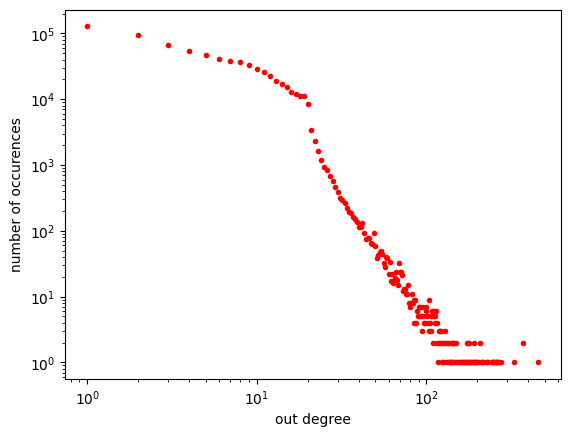

In [21]:
def out_degree_distribution(out_neighbors):
    out_degree_dist = {}
    for node in out_neighbors:
        out_degree = len(out_neighbors[node])
        if out_degree not in out_degree_dist:
            out_degree_dist[out_degree] = 0
        out_degree_dist[out_degree] += 1
    return out_degree_dist

def in_degree_distribution(in_neighbors):
    in_degree_dist = {}
    for node in in_neighbors:
        in_degree = len(in_neighbors[node])
        if in_degree not in in_degree_dist:
            in_degree_dist[in_degree] = 0
        in_degree_dist[in_degree] += 1
    return in_degree_dist

def plot_out_degree_dist(out_neighbors, log=True):
    out_degree_dist = out_degree_distribution(out_neighbors)
    x = list(out_degree_dist.keys()) # Prend les degrés sortants comme valeurs de x
    y = list(out_degree_dist.values()) #Extrait les fréquences correspondantes comme valeurs de y
    if log:
        plt.loglog(x, y, '.',color='red')
    else:
        plt.plot(x, y,'.', color='red')
    plt.xlabel("out degree")
    plt.ylabel("number of occurences")
    plt.show()

def plot_in_degree_dist(in_neighbors, log=True):
    in_degree_dist = in_degree_distribution(in_neighbors)
    x = list(in_degree_dist.keys()) # Prend les degrés entrants comme valeurs de x
    y = list(in_degree_dist.values()) #Extrait les fréquences correspondantes comme valeurs de y
    if log:
        plt.loglog(x, y, '.',color='red')
    else:
        plt.plot(x, y,'.', color='red')
    plt.xlabel("in degree")
    plt.ylabel("number of occurences")
    plt.show()


print(out_neighbors) #voisins sortants
print(in_neighbors) #voisins entrants

plot_out_degree_dist(out_neighbors)

### Question 12

1) Recall what is the time complexity to find if a node $j$ is a neighbour of node $i$ in the adjacency list format.

2) Now suppose that we order the lists of neighbors of the nodes by indices, can you propose a more efficient way to check that node $j$ is a neighbour of node $i$?

3) Implement your proposition.

1) The complexity is O(d(v))
2) We can use the binary search

In [ ]:
def is_neighbor(i, j, adjacency_list):
    neighbors = adjacency_list[i]
    # Binary search 
    left=0
    right = 0
    len(neighbors) - 1

    while left <= right: # While there are still elements to search
        mid = (left + right) // 2  # Calculate the middle index
        if neighbors[mid] == j: # j is in the left half
            return True  
        elif neighbors[mid] < j: # j is in the right half
            left = mid + 1 #move the left index to the middle by one step
        else:
            right = mid - 1 #move the right index to the middle by one step

    return False  # j is not a neighbor of i